# Statistics

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Probability

In [3]:
p_cofee_drinker = .65
p_cancer = .005
p_coffee_drinker_given_cancer = .85
p_cancer_given_coffee_drinker = p_coffee_drinker_given_cancer * p_cancer / p_coffee_drinker_given_cancer
print(p_cancer_given_coffee_drinker)

0.005


### Binomial Distribution

In [4]:
from scipy.stats import binom

n = 10
p = .9

for k in range(n + 1):
    probability = binom.pmf(k, n, p)
    print(f"{k} - {probability}")

0 - 9.999999999999978e-11
1 - 8.999999999999978e-09
2 - 3.6449999999999943e-07
3 - 8.747999999999991e-06
4 - 0.00013778099999999974
5 - 0.0014880347999999982
6 - 0.011160260999999996
7 - 0.05739562799999997
8 - 0.1937102444999998
9 - 0.38742048899999976
10 - 0.3486784401000001


### Beta Distribution

In [5]:
from scipy.stats import beta
a = 8
b = 2
p = beta.cdf(.90, a, b)
print(p)

p = 1.0 - beta.cdf(.90, a, b)
print(p)

0.7748409780000002
0.22515902199999982


Calculating the área between .9 and .8 ```|___--__|```

In [6]:
from scipy.stats import beta
a = 8
b = 2
p = beta.cdf(.90, a, b) - beta.cdf(.8, a, b)
print(p)

0.33863336199999994


### Descriptive Statistics

In [7]:
# calculate mean
# number of pets each persos owns
sample = [1, 3, 2, 5, 7, 0, 2, 3]
mean = sum(sample) / len(sample)
print(mean)

2.875


There are two versions of mean: The sample mean $\bar{x}$ and the population mean $y$ expressed as:
$$
\bar{x} = \frac{x_1 + x_2 + x_3 + ... + x_n}{n} = \sum\frac{x_i}{n} \\[5pt]
\mu = \frac{x_1 + x_2 + x_3 + ... + x_n}{n} = \sum\frac{x_i}{N}
$$

* **Weighted Mean**
$$
wmean = \frac{(x_1 * w_1) + (x_2 * w_2) + (x_3 * w_3) + ... + (x_n * w_n)}{w_1 + w_2 + w_3 + ... + w_n}
$$

In [8]:
sample = [90, 80, 63, 87]
weights = [.20, .20, .20, .40]
wmean = sum(s * w for s, w in zip(sample, weights)) / sum(weights)
print(wmean)

# weights dont have to be porcentages
weights = [1, 1, 1, 2]
wmean = sum(s * w for s, w in zip(sample, weights)) / sum(weights)
print(wmean)

81.4
81.4


* **Median**

In [9]:
sample = [0, 1, 5, 7, 9, 10, 14]

def median(values):
    ordered = sorted(values)
    print(ordered)
    n = len(ordered)
    mid = int(n / 2) - 1 if n % 2 == 0 else int(n/2)
    if n % 2 == 0:
        return (ordered[mid] + ordered[mid+1]) / 2.0
    else:
        return ordered[mid]

print(median(sample))

[0, 1, 5, 7, 9, 10, 14]
7


* **Mode**

In [10]:
from collections import defaultdict
sample = [1, 3, 2, 5, 7, 0, 2, 3]


def mode(values):
    counts = defaultdict(lambda: 0)
    for s in values:
        counts[s] += 1
    max_count = max(counts.values())
    modes = [v for v in set(values) if counts[v] == max_count]
    return modes
    
print(mode(sample))

[2, 3]


* **Variance and Standard Deviation**
$$
population\_variance = \frac{(x_1-mean)^2+(x_2-mean)^2+...+(x_n-mean)^2}{N} \\[5pt]
\sigma^2=\frac{\sum(x_i-\mu)^2}{N} \\[5pt]
standard\_deviation = \sqrt{\sigma^2=\frac{\sum(x_i-\mu)^2}{N}}
$$

In [11]:
from math import sqrt

sample = [0, 1, 5, 7, 9, 10, 14]

def variance(values, is_sample: bool = False):
    mean = sum(values) / len(values)
    _variance = sum((v - mean) ** 2 for v in values) / (len(values) - (1 if is_sample else 0))
    return _variance

print("variance", variance(sample))
print("standard deviation", sqrt(variance(sample)))

variance 21.387755102040813
standard deviation 4.624689730353898


* **Sample Variance and Standard Deviation**
$$
s^2=\frac{\sum(x_i-\bar{x})^2}{n-1} \\[5pt]
s=\sqrt{\frac{\sum(x_i-\bar{x})^2}{n-1}} \\[5pt]
$$

In [12]:
def std_dev(values, is_sample: bool = True):
    return sqrt(variance(values, is_sample))

data = [0, 1, 5, 7, 9, 10, 14]

print("variance = {}".format(variance(data, is_sample=True)))
print("std dev = {}".format(std_dev(data, is_sample=True)))

variance = 24.95238095238095
std dev = 4.99523582550223


* **The Normal Distribution**

* **The Probability Density Function**
$$
f(x) = \frac{1}{\sigma}*\sqrt{2\pi}*e^{-\frac{1}{2}\big(\frac{x-\mu^2}{\sigma}\big)}
$$

* **The Cumulative Density Function**

In [13]:
from scipy.stats import norm
mean = 64.43
std_dev = 2.99

x = norm.cdf(64.43, mean, std_dev)
print(x)

# finds the probability for 62 to 66 golden retriever weigths
x = norm.cdf(66, mean, std_dev) - norm.cdf(62, mean, std_dev)
print(x)

0.5
0.4920450147062894


* **Inverse CDF**
We use to input a probability and return a x-value

In [14]:
from scipy.stats import norm

x = norm.ppf(.95, loc=65.43, scale=2.99)
print(x, "pounds") # result in specific unit

70.3481123445849 pounds


(array([  7.,  49., 114., 162., 202., 205., 150.,  85.,  22.,   4.]),
 array([55.6469104 , 57.47296151, 59.29901261, 61.12506372, 62.95111483,
        64.77716593, 66.60321704, 68.42926814, 70.25531925, 72.08137036,
        73.90742146]),
 <BarContainer object of 10 artists>)

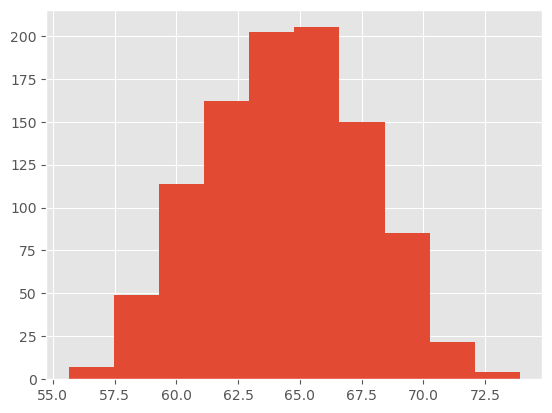

In [15]:
import random
from scipy.stats import norm
import matplotlib.pyplot as plt

data = []

# generates an entire golden retriever population from inverse cdf function
for i in range(0, 1000):
    random_p = random.uniform(.0, 1.0)
    random_weight = norm.ppf(random_p, loc=64.43, scale=2.99) # loc - level of confidence, scale - std deviation
    data.append(random_weight)

plt.hist(data)


* **Z-Scores**
$$
z = \frac{x-\mu}{\sigma}
$$

In [16]:
def z_score(x, mean, std):
    return (x - mean) / std

def z_to_x(z, mean, std):
    return (z * std) + mean

mean = 140000
std_dev = 3000
x = 150000

z = z_score(x, mean, std_dev)
back_to_x = z_to_x(z, mean, std_dev)
print("z-score: {}".format(z))
print("back to x: {}".format(back_to_x))

z-score: 3.3333333333333335
back to x: 150000.0


* **Coefficient of Variation**
$$
cv = \frac{\sigma}{\mu}
$$

### Inferential Statistics

* **The Central Limit Therorem** \
When we start measuring large enough samples from a population, even if that population does not follow a normal distribution, the normal distribution still makes an appearance.
If we increasingly take large samples from a population, take the **avarage** of each we will get a normal distribution.

1. The mean of the sample means is equal to the population mean.
2. If the population is normal, then the samples will be normal.
3. If the population is not normal, but the sample size is greater than 30, the sample means will still roughly form a normal distribution.
4. The standard deviation of the sample means equals the population standard deviation divided by the square root of $n$.

#### Example

_Based on a sample of 31 golden retrievers with a sample mean of 64.408 and a
sample standard deviation of 2.05, I am 95% confident that the population mean
lies between 63.686 and 65.1296_.

$$
sample\_std\_dev = \frac{population\_standard\_deviation}{\sqrt{sample\_size}} \\[10pt]
$$
* **Margin of Error E**
$$
E = \pm zc \frac{s}{\sqrt{n}} \\[10pt]
E = \pm1.95996*\frac{2.05}{\sqrt{31}} \\[10pt]
E = \pm 0.72164
$$

(array([ 19.,  58., 125., 183., 234., 200., 110.,  50.,  16.,   5.]),
 array([0.35918096, 0.39020492, 0.42122888, 0.45225283, 0.48327679,
        0.51430074, 0.5453247 , 0.57634866, 0.60737261, 0.63839657,
        0.66942052]),
 <BarContainer object of 10 artists>)

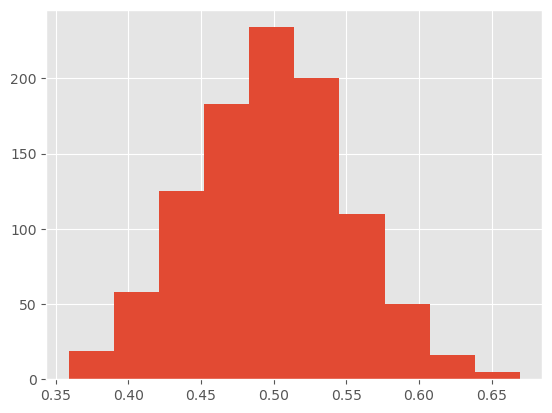

In [17]:
import random
import matplotlib.pyplot as plt

sample_size = 31
sample_count = 1000
x_values = [(sum([random.uniform(0.0, 1.0) for i in range(sample_size)]) / sample_size) for _ in range(sample_count)]
#y_values = [1 for _ in range(sample_count)]
#print(y_values)
#px.histogram(x = x_values, y = y_values, nbins=20).show()
plt.hist(x_values)

In [18]:
from math import sqrt
from scipy.stats import norm

def critical_z_value(p):
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    upper_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)

print(critical_z_value(p=.95))
def confidence_interval(p, sample_mean, sample_std, n):
    lower, upper = critical_z_value(p)
    lower_ci = lower * (sample_std / sqrt(n))
    upper_ci = upper * (sample_std / sqrt(n))
    return sample_mean + lower_ci, sample_mean + upper_ci

print(confidence_interval(p=.95, sample_mean=64.408, sample_std=2.05, n=31))

(-1.959963984540054, 1.959963984540054)
(63.68635915701992, 65.12964084298008)


* **Understanding P-Values**

### Hipothesis Testing

* **One-Tailed Test**

In [4]:
# Calculating the probability of recovery between 15 and 21 days from a cold
from scipy.stats import norm

mean = 18
std_dev = 1.5

# 95% probability recovery time takes between 15 and 21 days
x = norm.cdf(21, mean, std_dev) - norm.cdf(15, mean, std_dev)
print(x)

x = norm.ppf(.05, mean, std_dev)
print(x)

0.9544997361036416
15.53271955957279


* **Two-Tailed Test**

In [4]:
from scipy.stats import norm

# Cold has 18 day mean recovery, 1.5 std dev
mean = 18
std_dev = 1.5

# What x-value has 2.5% of area behind it?
x1 = norm.ppf(.025, mean, std_dev)

# What x-value has 97.5% of area behind it?
x2 = norm.ppf(.975, mean, std_dev)

print("x1:", x1, "x2:", x2)

# Calculating the two-tailed p-value
# Probability of 16 or less days
p1 = norm.cdf(16, mean, std_dev)

# Probability of 20 or more days
p2 = 1.0 - norm.cdf(20, mean, std_dev)
p_value = p1 + p2

print(p_value)

x1: 15.060054023189918 x2: 20.93994597681008
0.18242243945173575


### The T Distribution

In [3]:
from scipy.stats import t

# Get critical value range for 95% confidence
# with sample size of 25
n = 25
lower = t.ppf(0.025, df=n-1)
upper = t.ppf(0.975, df=n-1)

print(lower, upper)

-2.063898561628021 2.0638985616280205
